# **Un computer "sbaglia"?**

## **Il computer fa quello che gli si dice, non quello che si vorrebbe**
La frase ironica a titolo di questo *notebook* è in realtà alla base di tutta la comunicazione: comunicare implica interagire e implica che vi sia una parte che deve esprimere l'obiettivo che ha in mente, e una parte che deve recepire il messaggio proiettandolo sul proprio modo di intendere la stessa problematica.

Tipicamente, i programmatori informatici vengono caricaturati in questo modo:

```
Mia mamma ha detto: "Figliolo, vai al supermercato e compra 1 bottiglia di latte.
Se ci sono le uova prendine 6."

Sono tornato con 6 bottiglie di latte.

Lei ha detto: "Perché hai comprato 6 bottiglie di latte?"

Io: "Perché avevano le uova!"
```

La difficoltà sta nell'interpretare a quale soggetto si riferisca il verbo "prendine", interpretazione che può dipendere da come sono scritte o sono pronunciate le prime due frasi. In funzione di come viene inerpretato il verbo, il risultato può essere quello di fare una spesa condizionale dove la quantità che viene acquistata di un prodotto dipende dalla disponibilità (o meno) di un altro prodotto.

A meno che entrambi i prodotti siano necessari ad una medesima ricetta, è certamente inusuale fare una spesa condizionale di questo tipo; per questo la scena descritta fa sorridere ma deve far riflettere su una cosa: un risultato del calcolo, come esseri umani, lo escludiamo a priori usando una informazione che esiste al di fuori del contesto del problema. Un computer potrebbe non avere tale informazione. Occorre, allora, prestare attenzione al fatto che un computer segure la logica dell'algoritmo senza applicare filtri legati al "senso comune".

## **Rappresentazione binaria dei numeri**
Tra le varie trappole che si presentano nella programmazione, bisogna fare attenzione a quella della rappresentazione dei numeri. Questa è una problematica di fondamentale importanza nell'ambito del calcolo. Risulta, quindi, importante sapere come "conta" un computer.

In un calcolatore, i numeri sono rappresentati nel sistema binario, che ha solo due cifre: 0 e 1. Questo deriva dalla cirtuiteria del calcolatore, che si basa su transistor, un componente che permette di amplificare (1) o interrompere (0) il passaggio di corrente in un cicuito. Oltre ai transistor ci sono altri modi per conservare una informazione binaria nelle componenti di memoria. Questi metodi fisici vengono associati al **bit**. Un insieme di 8 bit formano un **byte**. I numeri sono rappresentati usando una sequenza di bit.


### **Numeri interi**
La sequenza di bit per un numero intero viene interpretata in questo modo: il primo bit determina il segno del numero, mentre il resto della sequenza determina la rappresentazione in base 2 del numero. Ad esempio, se venissero usati 3 bit per rappresentare gli interi, contando il primo come segno, i numeri rappresentabili sarebbero:
```
000 = +0
001 = +1
010 = +2
011 = +3
100 = -0
101 = -1
110 = -2
111 = -3
```
Se $N$ è il numero di bit, allora il numero più grande, in valore assoluto, rappresentabile è $2^{N-1}-1$. I numeri interi rappresentabili sono, quindi, compresi nell'intervallo $\pm(2^{N-1}-1)$.

**NB**: un computer non può "contare" fino all'infinito, di conseguenza non tutte le possibili operazioni tra numeri sono consentite. Si possono fare solo quelle che come risultato diano dei numeri che il computer può rappresentare. Altrimenti, in gergo, si va in *overflow*.

### **Numeri decimali**
I computer moderni usano 64 bit per rappresentare un numero decimale (*floating point*). Scrivendo i bit in una sequenza lineare, quello più a sinistra viene usato per il segno, come nell'esempio sopra. I successivi 11 bit (sempre da sinistra a destra) sono usati per rappresentare l'esponente (**da dare a 2**), e i rimanenti 52 bit rappresentano la mantissa.

Facendo un esempio semplificato, supponiamo di usare 9 bit: il primo determina il segno, i bit 2-5 l'esponente (con segno) e i bit 6-9 la mantissa. Per decifrare la sequenza ```0 1110 1011``` si procede come segue:
* ```0``` segno $(-1)^0 = +1$
* ```1 110``` esponente: $(-1)^1 \times (110)_2=-(1\times 2^2 + 1\times 2^1 + 0\times 2^0)=-(6)_{10}$
* ```1011``` mantissa: $(1.\color{red}{1011})_2=1\times2^0 + 1\times 2^{-1} + 0\times 2^{-2} + 1\times 2^{-3} + 1\times 2^{-4}=(1.6875)_{10}$

Mettendo tutto assieme: $1.6875\cdot 2^{-6}=0.026367$.



Proviamo a fare il processo al contrario e trovare la sequenza di bit (nell'ipotetico computer a 9 bit di sopra) con cui rappresentare $54.75$.

Partendo dalla rappresentazione binaria: $(54.75)_{10}=(110110.11)_2=(1.1011011)_2\cdot 2^{(5)_{10}}$

L'esponente, contando che è positivo (primo bit = 0), diventa: ```0101```.

La mantissa sarebbe ```1011011```, ma sono troppi bit, per cui va troncata ai primi 4.

Infine, contando che il numero è positivo, il primo bit è ```0```.

Quindi, la rappresentazione a 9 bit di $54.75$ è ```001011011```.

**NB**: nella conversione è stata troncata la mantissa. Se ricostruiamo il numero si ottiene: $(1.1011)_2 = 1 + 1/2 + 1/8 + 1/16 = 1.6875$, da cui
$1.6875\cdot 2^5=54$. Quindi, il computer a 9 bit non può rappresentare questo numero e in una operazione in cui il numero decimale risultante dal calcolo è 54.75, l'ipotetico computer a 9 bit commetterà un errore di arrotondamento.

### **Errore macchina**
L'errore macchina, $\epsilon$, viene definito come il numero più piccolo tale per cui, per il computer,<br><br>
\begin{equation}
1+\epsilon > 1
\end{equation}<br>
Nel computer a 9 bit degli esempi di sopra, $(1)_{10}=(1.0000)_2\cdot 2^{(000)_2}$, per cui la sequenza di bit è: ```000000000```.
Il prossimo numero sarà: ```000000001```, ossia $(1.0001)_2\cdot 2^{(000)_2}=(1.0625)_{10}$.

Di conseguenza $\epsilon = 0.0625$. In generale, se $M$ è il numero di bit usati per sappresentare la mantissa, $\epsilon=2^{-M}$.
<br><br>
**NB**: l'errore relativo che si compie nel rappresentare un numero, $x$, in un computer è sempre
\begin{equation}
\displaystyle{\left | \frac{x-\tilde{x}}{x}\right|} \leq \epsilon
\end{equation}
se $\tilde{x}$ è la rappresentazione nel computer di $x$.

### **Errori di arrotondamento**
Si può dire che un numero rappresentato in un computer sia affetto da un errore relativo non superiore all'errore macchina. Questo implica che quando si fanno operazioni tra i numeri, l'errore venga propagato.

#### *Errore sulla somma*
Proviamo a fare una somma tra numeri in un computer a 6 bit, che rappresenta i decimali con il seguente schema:


```segno numero (1 bit) | segno esponente (1 bit) | esponente (1 bit) | mantissa (3 bit)```

Proviamo a sommare $1 + 2^{-4}$ in un computer IEEE programmato per troncare al più vicino (se equidistante, si sceglie il numero che finisce con 0):

$1.000\times 2^{0} + 1.000\times 2^{-4} = 1.000\times 2^{0} + 0.0001\times 2^0=1.0001\times 2^{0}$

Dato che la mantissa ha solo 3 bit, il numero sarà approssimato a $1.000\times 2^0 = 1$. Quindi, l'errore di arrotondamento è pari a $2^{-4}$.
<br><br>
**Esercizio**: qual è l'errore che si commette, in questo computer, sommando 9 + 0.25?

$(9)_{10}=(1001)_2=(1.001)_2\times 2^{3}$

$(0.25)_{10}=(0.01)_2=(1.00)_2\times 2^{-2}=(0.00001)_2\times 2^{3}$

Sommando: $1.00101\times 2^3$, che però viene rappresentato come 9: l'errore assoluto è di 0.25, che corrisponde ad un errore del 2.7%.
<br><br>
**Esercizio**: qual è l'errore che si commette sommando 70 e 80?

$(70)_{10}=(1000110)_2=(1.000110)_2\times 2^{6}$

$(80)_{10}=(1010000)_2=(1.010000)_2\times 2^{6}$

Sommando: $10.010110\times 2^6=1.0010110\times 2^7$. La mantissa, però, viene troncata a 3 bit: $1.001\times 2^7=1001\times 2^4=(144)_{10}$ invece di 150. L'errore assoluto è di 6, quello relativo del 4%.

La perdita di precisione nella somma si chiama **assorbimento**.

#### *Erorre nelle differenze*
La differenza è affetta dall'assorbimento, ma si può presentare anche un altro problema che viene chiamato **cancellazione sottrattiva** per cui la sottrazione tra due numeri dà 0 anche a causa degli errori di arrotondamento. Ad esempio, volendo fare la differenza $(1+\epsilon)-(1-\epsilon)$ si vede facilmente che sebbene il risultato sia $2\epsilon$, che sarebbe ben rappresentabile in un computer, a causa dell'arrotondamento il risultato è 0!

Quando un numero viene considerato 0 perché troppo piccolo rispetto alla precisione macchina, si parla di *underflow*.

#### *Accumulo degli errori*
Ripetendo operazioni soggette ad un errore, tale errore continua ad accumularsi nel risultato. Di conseguenza, può capitare che l'operazione da svolgere debba essere rielaborata per eseguire operazioni che propaghino meno l'errore in modo da ottenere un calcolo esatto entro la precisione prefissata. L'accumulo dell'errore si osseva in
* **algoritmi instabili**: quando una piccola variazione nell'*input* genera grandi variazioni nell'*output*.
* **problemi malcondizionati**: grandi variazioni di *output* si ottengono per piccole variazioni dell'*input* sebbene l'algoritmo sia stabile.

Nelle prossime celle si riportano due esempi di algoritmi instabili.

<br><u>Esempio 1</u>

Si vuole calcolare $f_1(x)=\sqrt{1+x}-1$. Tale calcolo diventa instabile per $x\rightarrow 0$, mentre l'espressione equivalente (dal punto di vista analitico) $f_2(x)=\displaystyle{\frac{x}{\sqrt{1+x}+1}}$ risulta essere molto più stabile in quanto si elimina la sottrazione tra numeri simili e la divisione è fatta per un numero prossimo a 1, per cui non modifica l'esponente.

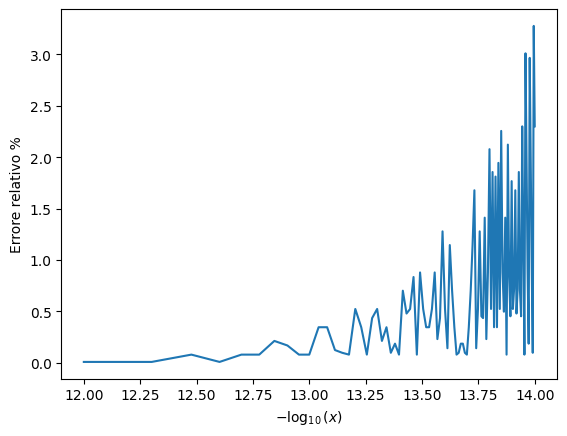

In [4]:
# @title Calcolo di $100\,|f_1(x)-f_2(x)|/f_2(x)$ per $x\rightarrow0$

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

N = 100

ax = np.zeros(N)
f1 = np.zeros(N)
f2 = np.zeros(N)

for i in range (1, N+1):
  x = 1.0e-12 / i
  ax[i-1] = x;
  f1[i-1] = sqrt(1.0 + x) - 1.0
  f2[i-1] = x / (sqrt(1.0 + x) + 1.0)

plt.plot(-np.log10(ax), 100*np.abs(f1-f2)/f2)
plt.xlabel("$-\log_{10}(x)$")
plt.ylabel("Errore relativo %")
plt.show()

<u>Esempio 2</u>
Si calcola la funzione $f_1(x,y)=x^2-y^2$ (ad esempio, si può utilizzare per rappresentare uno degli orbitali $3d$ di un atomo). Il calcolo porta alla cancellazione sottrattiva per $x\approx y$. L'errore viene ridotto sensibilmente se si modifica la funzione in $f_2(x,y)=(x-y)(x+y)$. Anche questo è soggetto alla cancellazione sotrattiva, ma il problema si presenta "più tardi" rispetto alla prima espressione perché non c'è l'elevamento a potenza.

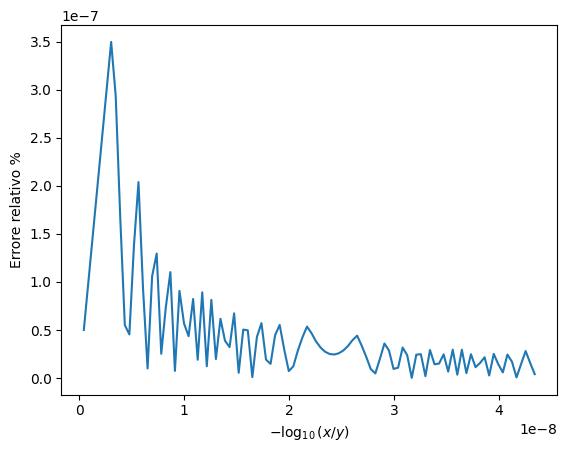

In [ ]:
# @title Calcolo di $100\,|f_1(x,y)-f_2(x,y)|/f_2(x,y)$ per $x\rightarrow y$

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

N = 100

ax = np.zeros(N)
f1 = np.zeros(N)
f2 = np.zeros(N)

y = 1.0
for i in range (1, N+1):
  x =  y * (1 - 1.e-7 * i / N)
  ax[i-1] = x/y
  f1[i-1] = x**2 - y**2
  f2[i-1] = (x-y) * (x+y)

plt.plot(-np.log10(ax), 100 * np.abs((f1-f2)/f2))
plt.xlabel("$-\log_{10}(x/y)$")
plt.ylabel("Errore relativo %")
plt.show()